In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [161]:
file_path = 'entregas_amazon2.csv'

# Leer el archivo CSV
data = pd.read_csv(file_path)

print (data)
data = data.drop(data.columns[0], axis=1)
# Guardar el archivo sin la primera columna
data.to_csv('entregas_amazon.csv', index=False)


     numero_entrega  distancia_km    trafico  clima  hora_pico  tiempo_entrega
0                63     99.885023  60.357447      0          1      130.086742
1               697     89.441605  15.312794      1          1       89.209681
2               165     28.311474  96.268269      0          0       75.783314
3               664      5.913094  17.685002      0          1       33.572976
4               772     88.052086  61.625807      0          1      121.254573
..              ...           ...        ...    ...        ...             ...
995             767     29.533181  24.380445      1          0       30.816768
996             926     62.786816  75.713932      1          0       83.086419
997             339     73.201623  46.215641      1          1       91.669119
998             644     46.881549  27.517617      1          1       61.264048
999             190     85.643931  90.603786      0          1      133.817038

[1000 rows x 6 columns]


Ajustamos tiempo de entrega con retrasos

GrÃ¡ficos exploratorios

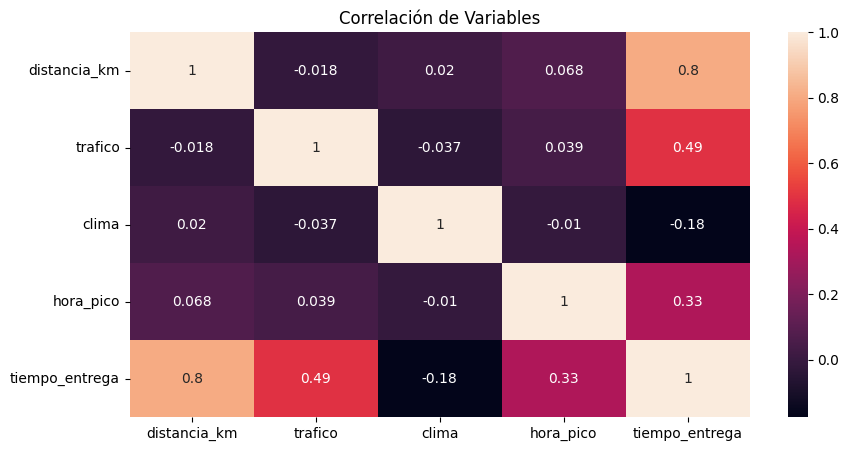

In [162]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlación de Variables')
plt.show()

Index(['distancia_km', 'trafico', 'clima', 'hora_pico', 'tiempo_entrega'], dtype='object')


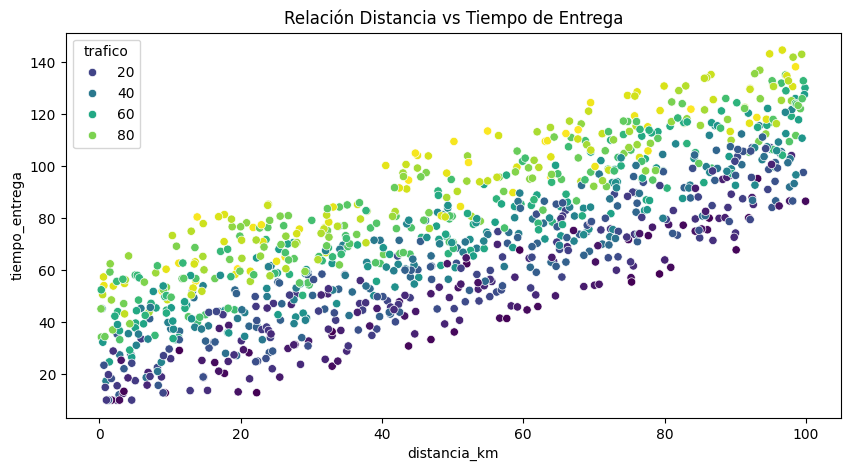

In [163]:
plt.figure(figsize=(10, 5))
print(data.columns)
sns.scatterplot(x='distancia_km', y='tiempo_entrega', hue='trafico', palette='viridis', data=data)
plt.title('Relación Distancia vs Tiempo de Entrega')
plt.show()

Modelo de RegresiÃ³n Lineal

In [164]:
X = data[['distancia_km', 'trafico', 'clima', 'hora_pico']]
y = data['tiempo_entrega']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = X_train[~np.isnan(X_train).any(axis=1)]
y_train = y_train[~np.isnan(y_train)]

In [165]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

Métricas del modelo

In [166]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}, RÂ²: {r2:.2f}")

RMSE: 0.34, RÂ²: 1.00


c:\Users\ingjo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


VisualizaciÃ³n de resultados

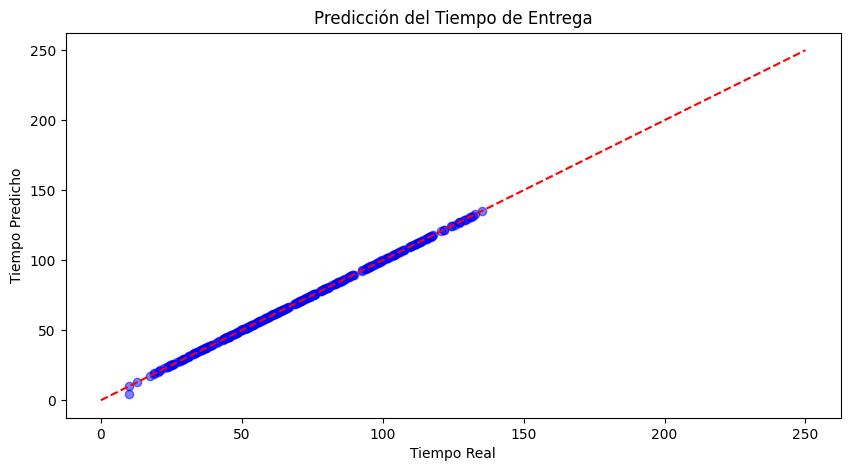

In [167]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([0, 250], [0, 250], color='red', linestyle='--')
plt.xlabel('Tiempo Real')
plt.ylabel('Tiempo Predicho')
plt.title('Predicción del Tiempo de Entrega')
plt.show()

Clustering con K-means

In [168]:
imputer = SimpleImputer(strategy='mean')

# Rellena los valores NaN
data[['distancia_km', 'trafico']] = imputer.fit_transform(data[['distancia_km', 'trafico']])
kmeans = KMeans(n_clusters=3, random_state=0)
data['cluster'] = kmeans.fit_predict(data[['distancia_km', 'trafico']])

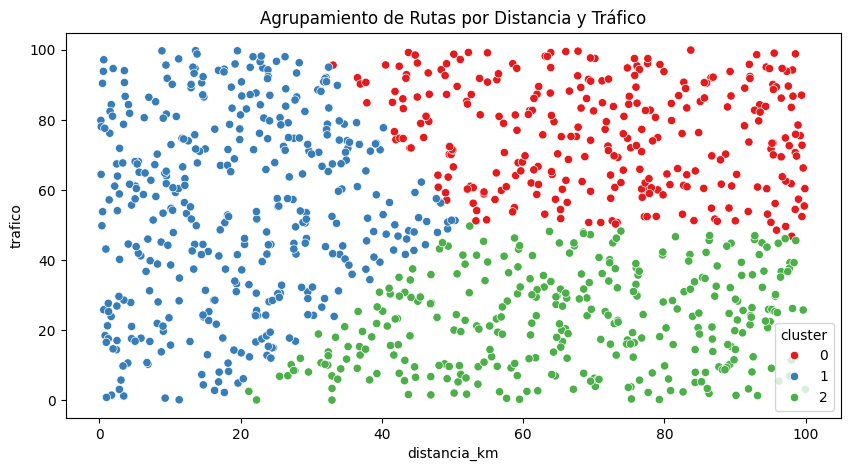

In [169]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='distancia_km', y='trafico', hue='cluster', palette='Set1', data=data)
plt.title('Agrupamiento de Rutas por Distancia y Tráfico')
plt.show()